In [1]:
from dask.distributed import Client , LocalCluster
cluster = LocalCluster()
cluster.adapt(minimum=1, maximum=3)
client = Client(cluster)
#cluster.scale(3)
import dask.dataframe as dd
import matplotlib
from dask_sql import Context
c = Context()

#from dask_sql import run_server
#run_server(context=c,client=client)

In [2]:
client

Client Scheduler: tcp://127.0.0.1:49588 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 2 Memory: 2.10 GB


In [ ]:


#from dask_sql import run_server
#run_server(context=c)

In [4]:
#client.close()
#cluster.close()
df = dd.read_csv('C:/Users/sivkumar/Documents/Github Repositories/Sample Data/developer_survey_2020/survey_results_public.csv', dtype={'Age1stCode': 'object'})

In [5]:
df = df.repartition(npartitions=1)

In [6]:
df.to_parquet(r'C:\Users\sivkumar\Documents\Github Repositories\Sample Data\Parquet\survey.parquet', compression='snappy')

In [7]:
df_pq = dd.read_parquet(r'C:\Users\sivkumar\Documents\Github Repositories\Sample Data\Parquet\survey.parquet')

In [8]:
c.create_table("survey", df)

<AxesSubplot:xlabel='Country', ylabel='avg_age'>

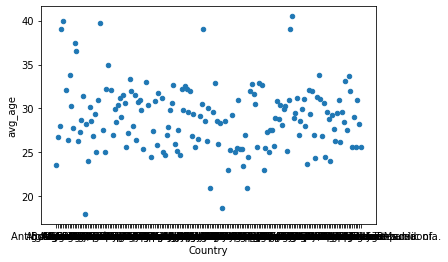

In [9]:
c.sql('select Country, avg(Age) as avg_age from survey group by Country').compute().plot(kind='scatter', x='Country', y='avg_age')

In [10]:
df_pq.groupby(['Country']).Age.max().compute()

Country
Afghanistan                             32.0
Albania                                 38.0
Algeria                                 99.0
Andorra                                 51.0
Angola                                  69.0
                                        ... 
Venezuela, Bolivarian Republic of...    66.0
Viet Nam                                89.0
Yemen                                   35.0
Zambia                                  46.0
Zimbabwe                                33.0
Name: Age, Length: 183, dtype: float64